In [4]:
import torch
import numpy as np

In [5]:
def circle(nx : int, ny: int, rad: int):
    '''funcion para construir circulos'''
    assert rad < min(nx,ny), 'el circulo debe estar completamente dentro'
    canvas = np.zeros(shape=(nx,ny))
    for i in range(nx):
        for j in range(ny):
            if ((i-nx//2)**2 + (j-ny//2)**2 < rad**2):
                canvas[i,j] = 1
    return canvas    

def square(nx : int, ny: int, length: int):
    '''funcion para construir cuadradillos'''
    assert length < min(nx,ny)
    canvas = np.ones(shape=(nx,ny))
    for i in range(nx):
        for j in range(ny):
            if (np.abs(i-nx//2) > length) or (np.abs(j-ny//2) > length):
                canvas[i,j] = 0
    return canvas

In [13]:

nx = 51
ny = 51

rng = np.random.default_rng()
y_train = rng.integers(0,2,200)
x_train = []
for i in y_train:
    if i == 0:
        x_train.append(circle(nx, ny, rng.integers(1,25)))
    else:
        x_train.append(square(nx, ny, rng.integers(1,25)))


def reduce_train(x_t):
    # como las imagenes son en 1 bit, basta con sumar los 1 para tener el area
    area_train = [x.sum() for x in x_t]
    diametro_train = [x[nx//2,:].sum() for x in x_t]
    return np.vstack([diametro_train,area_train]).T

x = reduce_train(x_train)
x.shape

(200, 2)

In [114]:
import torch
class Clasif(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = torch.nn.Linear(in_features=2, out_features=8)
        self.act = torch.nn.ReLU()
        self.lin2 = torch.nn.Linear(in_features=8, out_features=1)
        self.act2 = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.lin(x)
        x = self.act(x)
        x = self.lin2(x)
        x = self.act2(x)
        return x

In [115]:
clas = Clasif()
criterio = torch.nn.MSELoss()
optim = torch.optim.Adam(clas.parameters(), lr = 1e-3)
print(clas)

Clasif(
  (lin): Linear(in_features=2, out_features=8, bias=True)
  (act): ReLU()
  (lin2): Linear(in_features=8, out_features=1, bias=True)
  (act2): Sigmoid()
)


In [116]:
for p in clas.parameters():
    print(p)

Parameter containing:
tensor([[ 0.3959, -0.5763],
        [-0.3763,  0.1520],
        [-0.5134,  0.3922],
        [ 0.3922,  0.5699],
        [-0.3441, -0.2422],
        [ 0.6868, -0.4482],
        [-0.3978,  0.2496],
        [-0.6543, -0.3937]], requires_grad=True)
Parameter containing:
tensor([-0.4811, -0.2043, -0.1638, -0.7070,  0.3583, -0.2433,  0.2049,  0.5595],
       requires_grad=True)
Parameter containing:
tensor([[ 0.2567, -0.1192,  0.2202, -0.2215, -0.3272, -0.2413, -0.2832,  0.2662]],
       requires_grad=True)
Parameter containing:
tensor([-0.1266], requires_grad=True)


In [117]:
ejemplo = torch.ones(3,2)
clas(ejemplo)

tensor([[0.4504],
        [0.4504],
        [0.4504]], grad_fn=<SigmoidBackward0>)

In [118]:
x_t = torch.from_numpy(x).float()
y_t = torch.from_numpy(y_train).view(-1,1).float()

In [119]:
history = []
for e in range(100):
    y_pred = clas(x_t)
    loss = criterio(y_t, y_pred)
    history.append(loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()
    clas.eval()
    # print(loss.item())

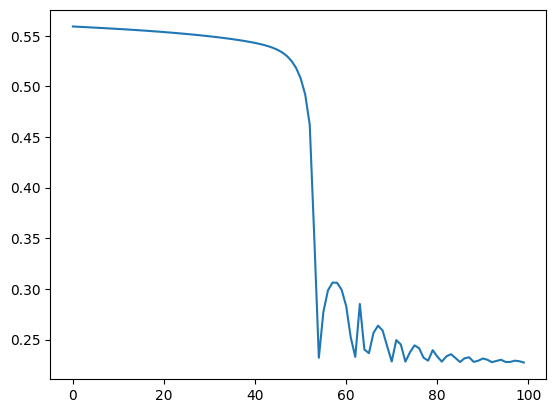

In [120]:
import matplotlib.pyplot as plt
plt.plot(history)

In [121]:
rng = np.random.default_rng()
y_val = rng.integers(0,2,10)
x_val = []
for i in y_val:
    if i == 0:
        x_val.append(circle(nx, ny, rng.integers(1,25)))
    else:
        x_val.append(square(nx, ny, rng.integers(1,25)))

x_val = reduce_train(x_val)

In [122]:
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).view(-1,1).float()
y_pval = clas(x_val)

In [124]:
print(y_val.flatten(0))
print(np.round(y_pval.flatten(0).detach().numpy(),0))

tensor([1., 1., 0., 1., 0., 0., 0., 0., 0., 0.])
[0. 1. 0. 1. 1. 1. 0. 0. 0. 0.]


In [69]:
for p in clas.parameters():
    print(p)

Parameter containing:
tensor([[-0.4831,  0.6965],
        [-1.6011,  1.1570]], requires_grad=True)
Parameter containing:
tensor([-0.8529, -1.3651], requires_grad=True)
Parameter containing:
tensor([[0.5463, 0.3372]], requires_grad=True)
Parameter containing:
tensor([-0.5790], requires_grad=True)
